### Tesseract
**Parâmetros:**

image_to_data(image, lang=None, config='', nice=0, output_type=Output.STRING, timeout=0, pandas_config=None)

**image object for string** - imagem (é preciso convertar para RGB)

**lang String** - lingua do tesseract, por default é eng. É possível múltiplas linguas: lang='eng+fra'

**config String** - qualquer custom adicional de configuração: config = '--psm 6'

**nice integer** - modifica a prioridade doo processador para execução do Tesseract. Não suportado no Windows. Nice ajusta a gentileza de processos do tipo unix

**output_type** - atributo de classe, especifica o tipo de saída, o padrão é string.

**timeout Interger or Float** - duração em segundos apra o processamento do OCR, após o qual o pytesseract será encerrado e aumentará o RuntimeError.

**pandas_config Dict** - somente para o tipo Output.DATAFRAME. Dicionário com argumentos personalizados para o pandas.read_csv. Permite personalizar a saída de imagem_to_data


In [5]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

In [6]:
path = r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\010-pytesseract\images\teste_tesseract.png'

In [7]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
boxes = pytesseract.image_to_data(img)

for b in boxes.splitlines():
    print(b)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	500	250	-1	
2	1	1	0	0	0	38	30	426	190	-1	
3	1	1	1	0	0	38	30	426	190	-1	
4	1	1	1	1	0	77	30	343	64	-1	
5	1	1	1	1	1	77	30	343	64	79.654716	Noisyimage
4	1	1	1	2	0	166	105	166	45	-1	
5	1	1	1	2	1	166	105	53	45	94.818550	to
5	1	1	1	2	2	235	105	97	45	96.047714	test
4	1	1	1	3	0	38	170	426	50	-1	
5	1	1	1	3	1	38	171	258	49	95.940567	Tesseract
5	1	1	1	3	2	312	170	152	50	96.452164	OCR


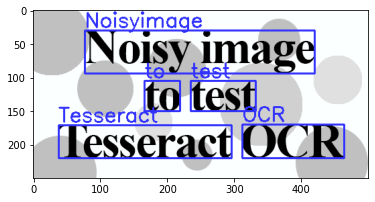

In [13]:
for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b = b.split()
        if len(b) == 12:
            x,y,w,h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            cv2.rectangle(img, (x,y), (x+w, y+h), (50,50,255), 2)
            cv2.putText(img, b[11], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (50,50,255), 2)
plt.imshow(img)
plt.show()